# SVM et Sélection d'attribut



## Variables d'environement

Pensez à vérifier les variables d'environement:

In [1]:
import sys

print(sys.version)
print(sys.path)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/ethiy/.ipython']


## Séparation linéaire

Le but de cette partie est de comparer le SVM linéaire à un autre exemple de classifieur linéaire: le Perceptron. On commence d'abords par rappeler rapidement le principe du Perceptron.

### Perceptron

L'algorithm du Perceptron date des [travaux de Frank Rosenblatt](http://psycnet.apa.org/record/1959-09865-001). Le but était de modéliser l'action des neurones. Ce modèle va être ensuite utilisé pour contruire des réseaux de neurones complexes et c'est la base de toute les méthodes de Deep Learning.

Le modèle donne pour chaque attribut $i \in \{1,2, \dots,d\}$ de la donnée d'entrée $x = \begin{pmatrix}x_1\\ x_2\\ \vdots \\x_d\end{pmatrix}$ un poids $w_i$. Pour chaque entrée $x$ on lui applique linéairement un vecteur de poids $w = \begin{pmatrix}w_1\\ w_2\\ \vdots \\w_d\end{pmatrix}$ pour lui attribuer un score $s = \langle w \vert x\rangle = \sum_{i=1,\dots,d}w_i.x_i$. Suite à ce score obtenu, on prends une décision:
* si $s < c \in \mathbb{R}$, on choisit la classe $0$;
* si $s \geq c $, on choisit la classe $1$

On peut écrire donc sa fonction de décision:

$$D_{perceptron}(x) \triangleq 2.\mathbb{1}_{\langle w \vert x \rangle + b \geq 0} - 1 = sign(\langle w \vert x \rangle + b)$$

où $b = -c$ et $\mathbb{1}_A(x) = \begin{cases}1 & , x \in A\\0 & , x \notin A\end{cases}$.

Le modèle du Perceptron revient donc à choisir un modèle de séparation de donnée linéaire. C'est en réalité une fammille de séparateur possibles. Nous n'avons aucune garantie sur son pouvoir de généralisation.

1. Qu'est ce qui différencie le SVM par rapport au Perceptron en terme de pouvoir de généralisation?

#### Réponse

1. 


### Régression logistique

Le modèle de régression logistique est proche des méthodes génératives. Ce modèle donne une relation entre les probabilités des attributs sachant la classe, comme suit:
$$ \ln \Big( \frac{p(x \vert y=1)}{p(x \vert y=-1)}\Big) = \langle w \vert x \rangle + c \quad , \forall x $$

2.
    a. En appliquant la règle de Bayes, montrer que: 
    $$\frac  {p(y=1\vert x)}{p(y=-1\vert x)} = \frac{p(y=1)}{p(y=-1)} . \frac{p(x \vert y=1)}{p(x \vert y=-1)}\quad , \forall x $$
    b. En déduire la formule suivante:
    $$\ln\Big(\frac  {p(y=1\vert x)}{1-p(y=1\vert x)}\Big) = \ln\Big(\frac{p(y=1)}{p(y=-1)}\Big) + c +\langle w \vert x \rangle \quad , \forall x $$
    c. On rappelle que $\eta(x) = p(y=1\vert x)$. Montrer que:
$$\eta(x) = \sigma( b +\langle w \vert x \rangle)$$
où: $$\sigma(t) \triangleq \frac{1}{1 + e^{-t}} \quad ,\forall t \in \mathbb{R}$$
    d. Montrer que:
    $$ sign(\sigma(t)) = \begin{cases}1 & , t>0 \\ -1 &, t\leq0 \end{cases}$$
    e. En déduire que la fonction de décision de Bayes pour le modèle logistique vérifie:
    $$ D_{logistic} = 2.\mathbb{1}_{\sigma( b +\langle w \vert x \rangle) \geq 0} - 1 = 2.\mathbb{1}_{b +\langle w \vert x \rangle \geq 0} - 1$$
    f. Qu'est ce que vérifie le séparateur dans un modèle logistique?

3.
    Ecrire un code python qui trace les deux fonctions, avec de multiple valeurs de $\lambda$, $t \mapsto \sigma(\lambda.t)$ et $t \mapsto \mathbb{1}_{t \geq 0}$, dans une même figure. A la lumière de la figure obtenue, discuter les deux fonctions de décisions.

#### Réponse





In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-20, 20, 1000)

lambdas = [.1, 1, 10]
colors = ['k', 'b', 'r']

plt.show()

### Comparaison

Le but du code, ci-dessous, est d'illustrer la différence entre le SVM, le Perceptron et la régression logistique.

4.
   a. Qu'est ce que fait ce bout de code?

   b. Commentez le résultat du programme suivant.

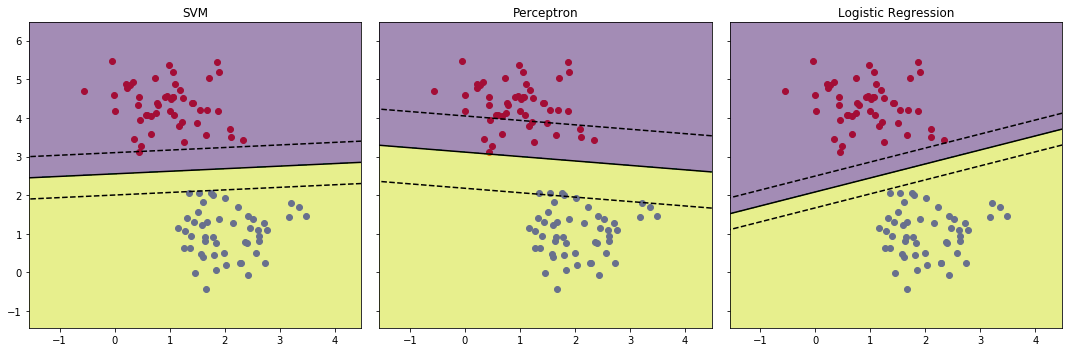

In [14]:
import sklearn.datasets
import sklearn.linear_model


def plot_points(points, ax, color):
    ax.scatter(points[:, 0], points[:, 1], c=color)
    

def plot_dataset(X, Y, ax, colors=['r', 'b']):
    for x, col in zip([X[Y==0], X[Y==1]], colors):
        plot_points(x, ax, col)
        

def mesh_from(instances, gap=.2):
    return np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, gap),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, gap),
    )


def plot_separator(xx, yy, ax, classifier, **parameters):
    """
        Plots separator.
        
        xx: mesh first coordinates
        yy: mesh second coordinates
        ax: subplot to draw in
        classifier: the trained classifier
    """
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **parameters)


def plot_margin(xx, yy, ax, classifier, **parameters):
    """
        Plots margins.
        
        xx: mesh first coordinates
        yy: mesh second coordinates
        ax: subplot to draw in
        classifier: the trained classifier
    """
    Z = np.empty(xx.shape)
    for (i, j), value in np.ndenumerate(xx):
        Z[i, j] = classifier.decision_function([[value, yy[i, j]]])[0]
    ax.contour(xx, yy, Z, [-1.0, 0.0, 1.0], colors='k', linestyles=['dashed', 'solid', 'dashed'])


X, Y = sklearn.datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
xx, yy = mesh_from(X, .01)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(5)
f.set_figwidth(15)

for ax, loss , title in zip([ax1, ax2, ax3], ['hinge', 'perceptron', 'log'], ['SVM', 'Perceptron', 'Logistic Regression']):
    plot_dataset(X, Y, ax)
    model = sklearn.linear_model.SGDClassifier(alpha=0.01, max_iter=100, loss=loss).fit(X, Y)
    plot_separator(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        model
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

#### Réponse:



### Pénalisation vs Généralisation

5.
   a. Entraîner des SVM linéaire avec différentes constantes de pénalisation $C$ sur les mêmes données.

   b. Tracer la marge selon les valeurs de la constante $C$.
   
   c. Commenter les résultats.

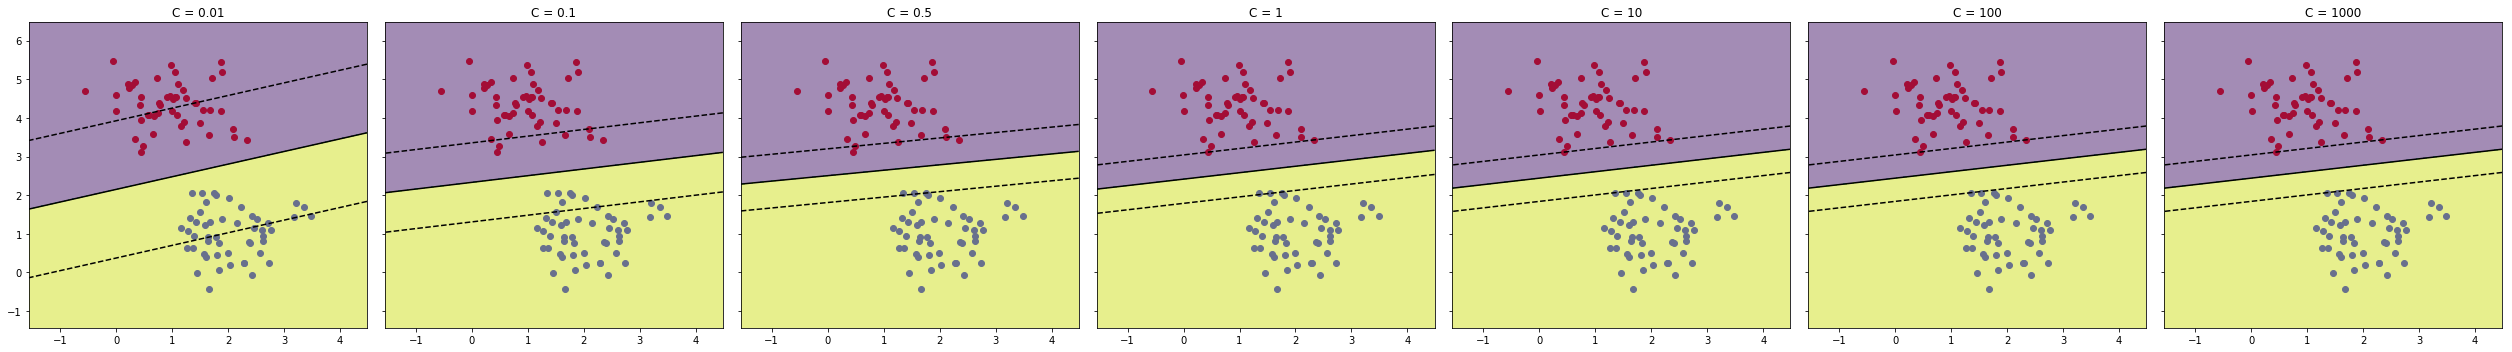

In [15]:
import sklearn.svm

Cs = [.01, .1, .5, 1, 10, 100, 1000]

f, axes = plt.subplots(1, len(Cs), sharey=True)
f.set_figheight(5)
f.set_figwidth(5 * len(Cs))

for C, ax in zip(Cs, list(axes)):
    plot_dataset(X, Y, ax)
    model = sklearn.svm.SVC(C=C, kernel='linear').fit(X, Y)
    plot_separator(
        xx,
        yy,
        ax,
        model,
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    plot_margin(
        xx,
        yy,
        ax,
        model
    )
    ax.set_title('C = ' + str(C))

plt.tight_layout()
plt.show()

#### Réponse:



### Kernel SVM

6.
   a. Entraîner le SVM, en choisissant la meilleur valeur pour $C$, avec le kernel polynomial et le kernel rbf en jouant sur le $\gamma$ sur les données suivantes.

   b. Commenter les résultats.
   

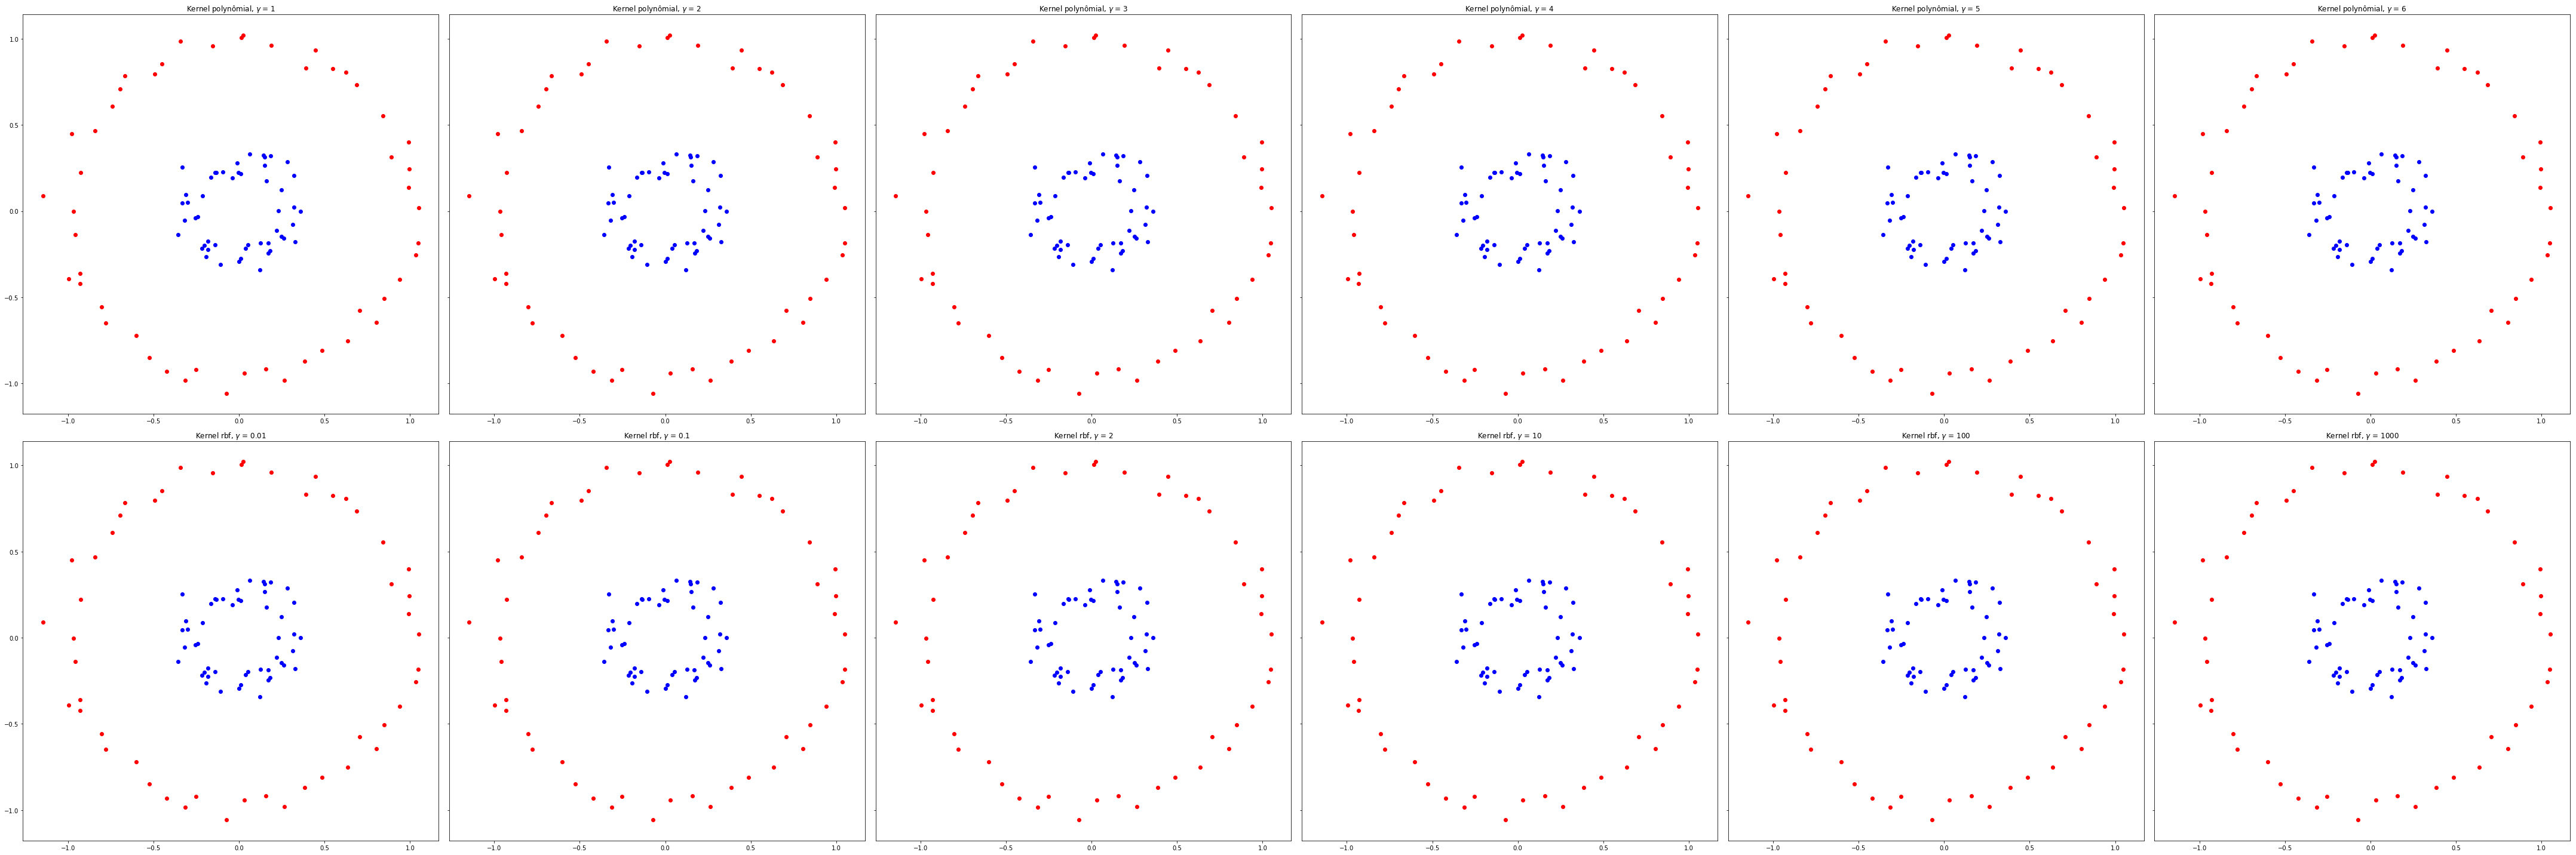

In [17]:
X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)
xx, yy = mesh_from(X, .01)

gammas = [1, 2, 3, 4, 5, 6]
f, axes = plt.subplots(2, len(gammas), sharey=True)
f.set_figheight(20)
f.set_figwidth(10*len(gammas))

for gamma, ax in zip(gammas, list(axes[0, :])):
    plot_dataset(X, Y, ax)
    
    ax.set_title('Kernel polynômial, $\gamma$ = ' + str(gamma))


gammas = [.01, .1, 2, 10, 100, 1000]
for gamma, ax in zip(gammas, list(axes[1, :])):
    plot_dataset(X, Y, ax)
    
    ax.set_title('Kernel rbf, $\gamma$ = ' + str(gamma))

plt.tight_layout()
plt.show()

#### Réponse:



## Validation croisée

### Train-Test split

Afin d'estimer le pouvoir de généralisation d'un classifieur, il faut le tester sur de nouvelles instances. On parle de données d'entraînement et données de tests. En pratique, on garde aussi des données de côtés pour la validation après calibrage entre entraînement et tests.

1. a. En utilisant la fonction [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) fournie par scikit-learn, entraîner un SVM linéaire sur 80% de vos données et tester sur le reste.

   b. Répéter l'experience plusieurs fois. Commenter les résultats

NameError: name 'X_train' is not defined

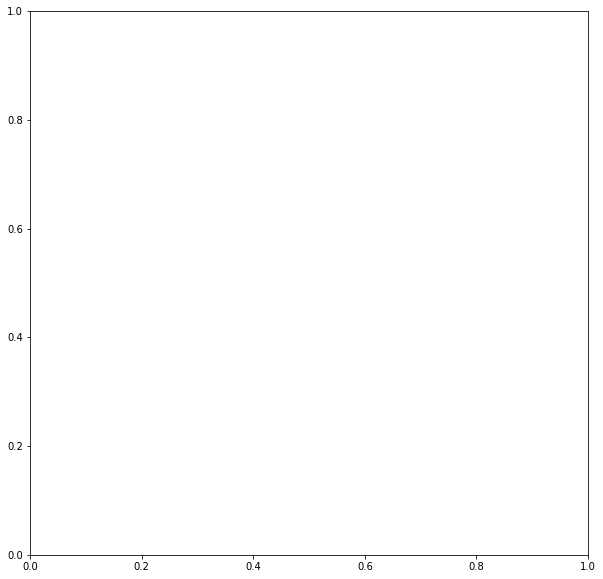

In [18]:
import sklearn.model_selection

X, Y = sklearn.datasets.make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=1.5)

# Répartir les données en 4/5 de train data et 1/5 de test data

# Entraîner le modèle

# Tester le modèle entraîné

f, ax = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)

plot_dataset(X_train, Y_train, ax)
plot_dataset(X_test, Y_test, ax, ['y', 'g'])
xx, yy = mesh_from(X, .01)

plt.tight_layout()
plt.show()

### Recherche de paramètres

L'idée de la validation croisée et que l'on varie les données d'entraînement et de test, de façon à ne pas entraîner sur les mauvaises instances et puis tester sur les instances les plus durs.

On subdivise donc toutes les données en $K$ parts égales. A l'instant $k = 1,\dots,K$, on isole la $k^{ième}$ part comme ensemble de test et on entraîne notre modèle sur les $K -1$ parties restantes. On obtient donc, $K$ score de test. Dans le meilleur des cas, on tombe sur les instances qui donnent le plus de pouvoir de généralisation possible.

Pour le SVM, avec juste les vecteurs supports, ce qui reprèsente moins de $10\%$ de la donnée dans notre cas, on obtient le meilleur séparateur linéaire. En cas pratique, au moment de la validation, on ne connaît pas les instances à prédire. On n'est pas sûr donc de tomber sur les vecteurs supports du meilleur modèle qui résoud le problème. On cherche donc, grâce à la validation croisée, les points les plus proches de la marge; pour avoir ainsi, le meilleur pouvoir de généralisation.

La généralisation passe aussi par le bon choix des paramètres du modèle. On utilise donc cette approche dans le but de trouver expérimentalement les meilleurs paramètres. Aussi, répète-t-on l'expérience afin d'essayer autant de configurations possibles. Les paramètres qui donnent les meilleurs scores de tests seront choisis au bout de l'étude.

Le *test score* n'est pas la seule métrique possible. On peut chercher à maximiser le *F-score*, comme on peut aussi s'intéresser qu'au score d'une classe donnée:

* Exemple: Vaudrait mieux un faux signal positif au scanner de bagage qu'un faux négatif (i.e. drogue ou explosif détectés comme sûrs ou un test sangui négatif pour un patient malade).


7.
    En utilisant la fonction [cross_validate](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) de scikit-learn, trouver la bonne valeur de $C$ pour un modèle SVM linéaire.

In [19]:
def cv_metrics(scores):
    return  (
                np.max(scores),
                np.mean(scores),
                np.median(scores),
                np.min(scores)
            )

Cs = [pow(2, p) for p in range(-15, 15)]

# tester avec tout les C dans Cs est stocker les scores
cv_scores = []
test_scores = [cv_metrics(scores['test_score']) for scores in cv_scores]

# le meilleur C est:


Commentaire:

### SVM vs Random Forest

8.
   a. Comparer le meilleur kernel SVM trouver dans la section 'Kernel SVM' avec une forêt aléatoire de votre choix. 

   b. Tracer les courbes de séparation.

   c. Justifier votre choix de nombre d'arbres et de profondeur.

9.
    Commenter les résultats.

In [20]:
import sklearn.ensemble
import sklearn.tree

X, Y = sklearn.datasets.make_circles(n_samples=100, factor=.3, noise=.05)
xx, yy = mesh_from(X, .01)

models = []

titles=[
    'Quadratic polynomial kernel SVM',
    'RBF kernel SVM with $\gamma = 2$',
    'Decision Tree, i.e. n_trees = 1',
    'Random Forest, n_trees = 1000, max_depth = 1',
    'Random Forest, n_trees = 1000, max_depth = 2',
    'Random Forest, n_trees = 1000, max_depth = 4',
    'Random Forest, n_trees = 1000'
]

f, axes = plt.subplots(1, len(models))
f.set_figheight(10)
f.set_figwidth(10*len(models))

for model, ax, title in zip(models, axes, titles):
    plot_dataset(X, Y, ax)
    
    ax.set_title(title)

plt.tight_layout()
plt.show()

IndexError: index out of range

1. c. La forêt aléatoire arrive à bien séparer les deux classes. Le nombre d'estimateurs doit bien évidemment être très grand. La profondeur doit être du même ordre de grandeur que la dimension de la donnée ($d=2$). On remarque bien que la forêt aléatoire avec $1000$ arbres et $2$ en profondeur arrive bien à séparer la donnée. Rajoutter de la profondeur ne rajoutte pas vraiment de pouvoir de généralisation pour le problème.

2. Le SVM arrive à donner la séparation avec le plus de marge possible. En pratique, on a pas toujours le privilège de connaître à l'avance la géométrie de la données. Il est plus facile d'entraîner des forêt alétoires que de trouver le kernel le mieux adapté.

## Sélection d'attribut

### Occupation des sols

L'occupation des sols à pour but de donner pour le type d'usage faits des terres. Naturellement, la manière la moins couteuse pour obtenir, à large échelle et à très grande fréquence, cette information, serait une approche automatique basée sur les images satellitaires.

On cherche à assigner, pour chaque pixel, un des types d'usage possibles, en utilisant la valeur du pixel ou son voisinage. On modèlise donc le problème avec classification supervisée.

#### Présentation de la donnée

Pour ce TP nous utilisons une image du satellite optique [Sentinel-2 du programme européen Copernicus](http://www.esa.int/Our_Activities/Observing_the_Earth/Copernicus/Sentinel-2). Cette image est acquise le 10 juillet 2016 et téléchargée depuis la plateforme [Theia](https://theia.cnes.fr).

10, des 13 bandes spectrales du satellite Sentinel-2, y sont disponibles en niveau de traitement 2A: B2, B3, B4, B5, B6, B7, B8, B8A, B11 et B12. Ces 10 bandes spectrales ont été réchantillonnées en géométrie terrain (Lambert 93) à 10 m de résolution spatiale et assemblées dans le fichier `sentinel-2_sample.tif`.

Les bandes spectrales de *Sentinel 2*:
![Les bandes spectrales de *Sentinel 2*][sentinel_2]

L'image `sentinel-2_sample.tif` concerne une zone de $14$ Km $\times14$ Km dans le département de la Haute-Garonne (31): ville de Saint-Gaudens. Toutes les données se trouvent dans le répértoire `./data`.

On dispose aussi de :
* `RGE-OCS.shp` : un extrait de l’OCS GE (**OC**cupation du **S**ol **G**rande **E**chelle) de l’IGN sur la zone d’étude;
* `RGE-foret.shp` : un extrait de la BD Forêt de l’IGN sur la zone d’étude.

A partir de ces données, on obtient la vérité terrain *raster* à la même échelle pour chaque pixel dans:
* `ground_truth_landcover.tif`: vérité terrain OCS générale.
* `ground_truth_forest.tif`: vérité terrain raster forêt-non forêt.


1. a. Ouvrir le fichier projet `dataset.qgs` avec QGIS. 

   b. Etudier l'histogramme des bandes de l'image hyperspectrale et la vérité terrain.
   
   c. En se basant sur la description des bandes [ici](https://sentinel.esa.int/web/sentinel/missions/sentinel-2/instrument-payload/resolution-and-swath), trouver les correspondances entre des canals de l'image et les bandes spectrales de Sentinel 2?

2. a. Charger l'image sur python en se servant de *gdal*.

   b. Ajouter le *NDVI* comme bande supplémentaire à votre donnée.
   
     * Rappel: $$NDVI = \frac{{\text{NIR}}-{\text{Red}}}{{\text{NIR}}+{\text{Red}}}$$
     * Astuce: ajouter un $\epsilon$ pour ne pas diviser sur zéro. $$NDVI = \frac{{\text{NIR}}-{\text{Red}}}{{\text{NIR}}+{\text{Red}}+\epsilon}$$

   c. Séparer les pixels en données d'entraînement et données de validation à un ratio de 4/5.
   
   d. Utiliser la validation croisée pour trouver le meilleur kernel et les bons paramètres de votre SVM.
   
   e. Qualifier les résultats obtenus.

[sentinel_2]: http://www.cesbio.ups-tlse.fr/data_all/images/sentinel1.png

In [9]:
import gdal
import gdalconst

def read(filename):
    """
        reads all bands of raster images.
        
        :param filename: the path to the raster image
        :type filename: string
        :return: a list containing a numpy matrix for each band
        :rtype: list
    """
    dataset = gdal.Open(filename, gdalconst.GA_ReadOnly)
    return [
        dataset.GetRasterBand(band).ReadAsArray().astype(np.float64)
        for band in range(1, dataset.RasterCount + 1)
    ]


def add_band(image, lhs, rhs, func):
    """
        add a band to an image by applying a function on two of the image bands.
        
        :param image: a list containing the image bands.
        :param lhs: index of the first band to use
        :param rhs: index of the second band to use
        :param func: the function to apply on the two bands
        :type image: list
        :type lhs: int
        :type rhs: int
        :type func: function
        :return: a list containing a numpy matrix for each band
        :rtype: list
    """
    return image.append(func(image[lhs], image[rhs]))


def add_ndvi(image):
    # Utiliser add_band
    return image


band_names = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11' , 'B12']
bands = read('./data/sentinel-2_sample.tif')


##### Réponses:

### Sélections d'attributs:

1. a. Estimer le nombre de toutes combinaisons d'attributs possibles.

   b. En utilisant les méthodes vues au cours (SVM-RFE, SFS , BFS et LR), établir une hiérarchie d'attributs (i.e. des bandes).
2. Comparer les différentes méthodes.
3. Commenter les hiérarchies obtenue.

In [10]:
import sklearn.feature_selection

def add_best_L_attributes(X_selected, L, X, classifier):
    # Compléter la fonction
    return X_selected


def remove_worst_R_attributes(X_selected, R, X, classifier):
    # Compléter la fonction
    return X_selected


def sfs(X, classifier):
    # Compléter la fonction
    return


def bfs(X, classifier):
    # Compléter la fonction
    return

def lr(X, L, R, classifier):
    # Compléter la fonction
    return

